# Install Required Libraries and Import Installed Libraries

In [1]:
!pip install pandas scikit-learn nltk joblib sentence-transformers


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip uninstall nltk -y
!pip install --upgrade nltk

Found existing installation: nltk 3.9.2
Uninstalling nltk-3.9.2:
  Successfully uninstalled nltk-3.9.2
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------ --------------------------------- 2.1/12.8 MB 10.4 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 9.7 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.8 MB 9.7 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 9.7 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 9.0 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 9.2 MB/s eta 0:00:01
     --------------------------------- ------ 10.7/12.8 MB 7.8 MB/s eta 0:00:01
     ------------------------------------- -- 12.1/12.8 MB 7.1 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 6.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Imports 

In [4]:
import pandas as pd
import os
import re
import spacy
import joblib
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\vasun\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\vasun\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\vasun\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

# Load O*NET TXT Files

In [5]:
DATA_DIR = "data"

files = {
    "occupation": "Occupation Data.txt",
    "skills": "Skills.txt",
    "abilities": "Abilities.txt",
    "interests": "Interests.txt",
    "education": "Education, Training, and Experience.txt",
    "job_zones": "Job Zones.txt",
    "tech_skills": "Technology Skills.txt",
    "alt_titles": "Alternate Titles.txt"
}

data = {}
for key, filename in files.items():
    path = os.path.join(DATA_DIR, filename)
    df = pd.read_csv(path, delimiter="\t", encoding="latin1")
    data[key] = df
    print(f"Loaded {key}: {df.shape}")


Loaded occupation: (1016, 3)
Loaded skills: (61530, 13)
Loaded abilities: (91416, 13)
Loaded interests: (8307, 7)
Loaded education: (36209, 13)
Loaded job_zones: (923, 4)
Loaded tech_skills: (32681, 6)
Loaded alt_titles: (56560, 4)


In [6]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Technology Skills.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code                                        Example  \
0     11-1011.00                                  Adobe Acrobat   
1     11-1011.00                                AdSense Tracker   
2     11-1011.00                                 Atlassian JIRA   
3     11-1011.00                    Blackbaud The Raiser's Edge   
4     11-1011.00  ComputerEase construction accounting software   

   Commodity Code                                Commodity Title  \
0        43232202                   Document management software   
1        43232306    Data base user interface and query software   
2        43232201                      Content workflow software   
3        43232303  Customer relationship management CRM software   
4        43231601                            Accounting software   

  Hot Technology In Demand  
0              Y         N  
1              N         N  
2              Y         N  
3              N         N  
4              N         N  
Index(['O*NET-

In [7]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Skills.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code Element ID           Element Name Scale ID  Data Value  N  \
0     11-1011.00    2.A.1.a  Reading Comprehension       IM        4.12  8   
1     11-1011.00    2.A.1.a  Reading Comprehension       LV        4.62  8   
2     11-1011.00    2.A.1.b       Active Listening       IM        4.00  8   
3     11-1011.00    2.A.1.b       Active Listening       LV        4.75  8   
4     11-1011.00    2.A.1.c                Writing       IM        4.12  8   

   Standard Error  Lower CI Bound  Upper CI Bound Recommend Suppress  \
0          0.1250          3.8800          4.3700                  N   
1          0.1830          4.2664          4.9836                  N   
2          0.0000          4.0000          4.0000                  N   
3          0.1637          4.4292          5.0708                  N   
4          0.1250          3.8800          4.3700                  N   

  Not Relevant     Date Domain Source  
0          NaN  08/2023       Analyst  
1            N  08

In [8]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Occupation Data.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code                                Title  \
0     11-1011.00                     Chief Executives   
1     11-1011.03        Chief Sustainability Officers   
2     11-1021.00      General and Operations Managers   
3     11-1031.00                          Legislators   
4     11-2011.00  Advertising and Promotions Managers   

                                         Description  
0  Determine and formulate policies and provide o...  
1  Communicate and coordinate with management, sh...  
2  Plan, direct, or coordinate the operations of ...  
3  Develop, introduce, or enact laws and statutes...  
4  Plan, direct, or coordinate advertising polici...  
Index(['O*NET-SOC Code', 'Title', 'Description'], dtype='object')


In [9]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Job Zones.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code  Job Zone     Date Domain Source
0     11-1011.00         5  08/2023       Analyst
1     11-1011.03         5  08/2021       Analyst
2     11-1021.00         4  08/2023       Analyst
3     11-1031.00         4  06/2008       Analyst
4     11-2011.00         4  08/2018       Analyst
Index(['O*NET-SOC Code', 'Job Zone', 'Date', 'Domain Source'], dtype='object')


In [10]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Interests.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code Element ID   Element Name Scale ID  Data Value     Date  \
0     11-1011.00    1.B.1.a      Realistic       OI        1.30  11/2023   
1     11-1011.00    1.B.1.b  Investigative       OI        3.24  11/2023   
2     11-1011.00    1.B.1.c       Artistic       OI        2.08  11/2023   
3     11-1011.00    1.B.1.d         Social       OI        3.52  11/2023   
4     11-1011.00    1.B.1.e   Enterprising       OI        6.88  11/2023   

      Domain Source  
0  Machine Learning  
1  Machine Learning  
2  Machine Learning  
3  Machine Learning  
4  Machine Learning  
Index(['O*NET-SOC Code', 'Element ID', 'Element Name', 'Scale ID',
       'Data Value', 'Date', 'Domain Source'],
      dtype='object')


In [11]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Education, Training, and Experience.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code Element ID                 Element Name Scale ID  Category  \
0     11-1011.00      2.D.1  Required Level of Education       RL       1.0   
1     11-1011.00      2.D.1  Required Level of Education       RL       2.0   
2     11-1011.00      2.D.1  Required Level of Education       RL       3.0   
3     11-1011.00      2.D.1  Required Level of Education       RL       4.0   
4     11-1011.00      2.D.1  Required Level of Education       RL       5.0   

   Data Value   N  Standard Error  Lower CI Bound  Upper CI Bound  \
0        0.00  28          0.0000             NaN             NaN   
1        4.46  28          4.1428          0.6307         25.5524   
2        0.00  28          0.0000             NaN             NaN   
3        0.00  28          0.0000             NaN             NaN   
4        5.15  28          5.2236          0.6000         32.7756   

  Recommend Suppress     Date Domain Source  
0                  N  08/2023     Incumbent  
1                 

In [12]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Alternate Titles.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code                       Alternate Title Short Title Source(s)
0     11-1011.00       Aeronautics Commission Director         NaN        08
1     11-1011.00                          Agency Owner         NaN        10
2     11-1011.00        Agricultural Services Director         NaN        08
3     11-1011.00  Arts and Humanities Council Director         NaN        08
4     11-1011.00                        Bank President         NaN        09
Index(['O*NET-SOC Code', 'Alternate Title', 'Short Title', 'Source(s)'], dtype='object')


In [13]:
file_path = r"D:\RS\SmartChoice_Career_Advisor\data\Abilities.txt"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
print(df.head())
print(df.columns)

  O*NET-SOC Code Element ID           Element Name Scale ID  Data Value  N  \
0     11-1011.00  1.A.1.a.1     Oral Comprehension       IM        4.62  8   
1     11-1011.00  1.A.1.a.1     Oral Comprehension       LV        4.88  8   
2     11-1011.00  1.A.1.a.2  Written Comprehension       IM        4.25  8   
3     11-1011.00  1.A.1.a.2  Written Comprehension       LV        4.88  8   
4     11-1011.00  1.A.1.a.3        Oral Expression       IM        4.50  8   

   Standard Error  Lower CI Bound  Upper CI Bound Recommend Suppress  \
0          0.1830          4.2664          4.9836                  N   
1          0.1250          4.6300          5.1200                  N   
2          0.1637          3.9292          4.5708                  N   
3          0.1250          4.6300          5.1200                  N   
4          0.1890          4.1296          4.8704                  N   

  Not Relevant     Date Domain Source  
0          NaN  08/2023       Analyst  
1            N  08

In [14]:
import pandas as pd
import os

# Folder containing the txt files
folder_path = r"D:\RS\SmartChoice_Career_Advisor\data"

# List all txt files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Dictionary to store DataFrames
dfs = {}

# Output folder for CSV/PKL
output_folder = os.path.join(folder_path, "processed")
os.makedirs(output_folder, exist_ok=True)

# Loop through each file
for file in files:
    file_path = os.path.join(folder_path, file)
    
    # Read tab-delimited txt file
    try:
        df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
    except Exception as e:
        print(f"Error reading {file}: {e}")
        continue
    
    # Store in dictionary
    dfs[file.split('.')[0]] = df
    
    # Save as CSV
    csv_path = os.path.join(output_folder, file.split('.')[0] + ".csv")
    df.to_csv(csv_path, index=False)
    
    # Save as Pickle
    pkl_path = os.path.join(output_folder, file.split('.')[0] + ".pkl")
    df.to_pickle(pkl_path)
    
    print(f"{file} processed -> {df.shape[0]} rows, {df.shape[1]} columns")

print("\nAll files processed and saved in:", output_folder)


Abilities.txt processed -> 91416 rows, 13 columns
Alternate Titles.txt processed -> 56560 rows, 4 columns
Education, Training, and Experience.txt processed -> 36209 rows, 13 columns
Interests.txt processed -> 8307 rows, 7 columns
Job Zones.txt processed -> 923 rows, 4 columns
Occupation Data.txt processed -> 1016 rows, 3 columns
Skills.txt processed -> 61530 rows, 13 columns
Technology Skills.txt processed -> 32681 rows, 6 columns

All files processed and saved in: D:\RS\SmartChoice_Career_Advisor\data\processed


In [15]:
processed_folder = r"D:\RS\SmartChoice_Career_Advisor\data\processed"
# Load each dataset into a variable
abilities_df = pd.read_csv(os.path.join(processed_folder, "Abilities.csv"))
alt_titles_df = pd.read_csv(os.path.join(processed_folder, "Alternate Titles.csv"))
edu_df = pd.read_csv(os.path.join(processed_folder, "Education, Training, and Experience.csv"))
interests_df = pd.read_csv(os.path.join(processed_folder, "Interests.csv"))
jobzone_df = pd.read_csv(os.path.join(processed_folder, "Job Zones.csv"))
occupation_df = pd.read_csv(os.path.join(processed_folder, "Occupation Data.csv"))
skills_df = pd.read_csv(os.path.join(processed_folder, "Skills.csv"))
techskills_df = pd.read_csv(os.path.join(processed_folder, "Technology Skills.csv"))


In [16]:
#Confirm loaded datasets
print(occupation_df.head())
print(skills_df.head())

  O*NET-SOC Code                                Title  \
0     11-1011.00                     Chief Executives   
1     11-1011.03        Chief Sustainability Officers   
2     11-1021.00      General and Operations Managers   
3     11-1031.00                          Legislators   
4     11-2011.00  Advertising and Promotions Managers   

                                         Description  
0  Determine and formulate policies and provide o...  
1  Communicate and coordinate with management, sh...  
2  Plan, direct, or coordinate the operations of ...  
3  Develop, introduce, or enact laws and statutes...  
4  Plan, direct, or coordinate advertising polici...  
  O*NET-SOC Code Element ID           Element Name Scale ID  Data Value  N  \
0     11-1011.00    2.A.1.a  Reading Comprehension       IM        4.12  8   
1     11-1011.00    2.A.1.a  Reading Comprehension       LV        4.62  8   
2     11-1011.00    2.A.1.b       Active Listening       IM        4.00  8   
3     11-1011.0

# Step 2: Data Pre-processing

Text Normalization
Clean the textual columns in each dataset:
Occupation Data → Description
Skills / Abilities / Interests → Element Name
Alternate Titles → Alternate Title

Tasks: Lowercasing Remove punctuation Stopword removal Lemmatization

In [17]:
# preprocessing
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(str(text).lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])
# for Occupation Data
occupation_df['Description_clean'] = occupation_df['Description'].apply(preprocess_text)
skills_df['Element Name_clean'] = skills_df['Element Name'].apply(preprocess_text)
abilities_df['Element Name_clean'] = abilities_df['Element Name'].apply(preprocess_text)
interests_df['Element Name_clean'] = interests_df['Element Name'].apply(preprocess_text)
alt_titles_df['Alternate Title_clean'] = alt_titles_df['Alternate Title'].apply(preprocess_text)

Encoding Categorical Fields

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
edu_encoded = encoder.fit_transform(edu_df[['Category']])


Skill Mapping / Matching

In [19]:
from rapidfuzz import process

def map_user_skills(user_skills, skill_list):
    return [process.extractOne(skill, skill_list) for skill in user_skills]

Rule-Based Filtering Functions

In [20]:
#  Filter by education level
def filter_by_education(user_edu_level, edu_df):
    # Category column represents required education level
    eligible_codes = edu_df[edu_df['Category'] <= user_edu_level]['O*NET-SOC Code'].unique()
    return eligible_codes

#  Filter by Job Zone
def filter_by_jobzone(user_exp_level, jobzone_df):
    # Job Zone 1-5; match user's experience (years) to job zone
    # Simple mapping: you can adjust thresholds
    exp_to_zone = {0:1, 1:2, 2:3, 3:4, 5:5}  # example
    eligible_codes = jobzone_df[jobzone_df['Job Zone'] <= exp_to_zone.get(user_exp_level,5)]['O*NET-SOC Code'].unique()
    return eligible_codes

#  Filter by industry / previous roles
def filter_by_experience(user_roles, alt_titles_df):
    # Match user roles with Alternate Titles
    matching_codes = alt_titles_df[alt_titles_df['Alternate Title'].str.lower().isin([r.lower() for r in user_roles])]
    return matching_codes['O*NET-SOC Code'].unique()

#  Filter by preferences (remote / part-time)
def filter_by_preferences(user_prefs, occupation_df):
    # Assuming occupation_df has 'Remote' / 'Part-time' columns
    filtered_df = occupation_df.copy()
    if user_prefs.get('remote'):
        filtered_df = filtered_df[filtered_df['Remote'] == 'Y']
    if user_prefs.get('part_time'):
        filtered_df = filtered_df[filtered_df['Part-time'] == 'Y']
    return filtered_df['O*NET-SOC Code'].unique()


Apply Rule-Based Filtering

In [21]:
# User input
user_edu_level = 4  # e.g., Bachelor = 4
user_exp_level = 2  # experience in years (mapping to Job Zone)
user_roles = ["Chief Executive", "Operations Manager"]
user_prefs = {"remote": True, "part_time": False}

# Education filter
edu_filtered = filter_by_education(user_edu_level, edu_df)

#  Job Zone filter
jobzone_filtered = filter_by_jobzone(user_exp_level, jobzone_df)

#  Experience / Industry filter
exp_filtered = filter_by_experience(user_roles, alt_titles_df)

#  Preferences filter
def filter_by_preferences(user_prefs, occupation_df):
    # Check if columns exist
    filtered_df = occupation_df.copy()
    if 'Remote' in filtered_df.columns and user_prefs.get('remote'):
        filtered_df = filtered_df[filtered_df['Remote'] == 'Y']
    if 'Part-time' in filtered_df.columns and user_prefs.get('part_time'):
        filtered_df = filtered_df[filtered_df['Part-time'] == 'Y']
    return filtered_df['O*NET-SOC Code'].unique()

# Combine filters without preferences
filtered_jobs = set(edu_filtered) & set(jobzone_filtered) & set(exp_filtered)

print(f"Total eligible job roles after rule-based filtering: {len(filtered_jobs)}")
print(filtered_jobs)

print(filtered_jobs)


Total eligible job roles after rule-based filtering: 0
set()
set()


In [22]:
print("Education filter:", len(edu_filtered), edu_filtered)
print("Job Zone filter:", len(jobzone_filtered), jobzone_filtered)
print("Experience filter:", len(exp_filtered), exp_filtered)

Education filter: 858 ['11-1011.00' '11-1011.03' '11-1021.00' '11-2011.00' '11-2021.00'
 '11-2022.00' '11-3012.00' '11-3013.00' '11-3021.00' '11-3031.00'
 '11-3031.01' '11-3031.03' '11-3051.00' '11-3051.01' '11-3051.02'
 '11-3051.03' '11-3051.04' '11-3051.06' '11-3061.00' '11-3071.04'
 '11-3111.00' '11-3121.00' '11-3131.00' '11-9021.00' '11-9031.00'
 '11-9032.00' '11-9033.00' '11-9041.00' '11-9041.01' '11-9051.00'
 '11-9071.00' '11-9081.00' '11-9111.00' '11-9121.00' '11-9121.01'
 '11-9121.02' '11-9131.00' '11-9141.00' '11-9151.00' '11-9161.00'
 '11-9171.00' '11-9179.01' '11-9179.02' '11-9199.01' '11-9199.02'
 '11-9199.08' '11-9199.09' '11-9199.10' '11-9199.11' '13-1011.00'
 '13-1021.00' '13-1022.00' '13-1023.00' '13-1031.00' '13-1032.00'
 '13-1041.01' '13-1041.03' '13-1041.04' '13-1041.06' '13-1041.07'
 '13-1041.08' '13-1051.00' '13-1071.00' '13-1074.00' '13-1075.00'
 '13-1081.00' '13-1081.01' '13-1081.02' '13-1111.00' '13-1121.00'
 '13-1131.00' '13-1141.00' '13-1151.00' '13-1161.00' '

In [23]:
# Combine filters (ignore experience for now)
filtered_jobs = set(edu_filtered) & set(jobzone_filtered)
print("Total eligible jobs after simplified filtering:", len(filtered_jobs))
print(filtered_jobs)


Total eligible jobs after simplified filtering: 515
{'49-3051.00', '25-3021.00', '43-5053.00', '51-3092.00', '53-1042.01', '31-9096.00', '35-3011.00', '31-1122.00', '45-2093.00', '47-5043.00', '43-9041.00', '51-4032.00', '17-3027.01', '51-9195.05', '39-3031.00', '51-9194.00', '43-1011.00', '53-2022.00', '41-2012.00', '53-4031.00', '53-7073.00', '47-4099.03', '49-9061.00', '47-2171.00', '43-2021.00', '53-6051.07', '51-4034.00', '53-6011.00', '39-6012.00', '51-9081.00', '51-3021.00', '47-2161.00', '13-1041.06', '35-3023.01', '37-1011.00', '13-2081.00', '29-2012.00', '33-1021.00', '49-3022.00', '15-1211.00', '47-4011.00', '33-3011.00', '19-4031.00', '53-7064.00', '49-9052.00', '19-4099.01', '53-7121.00', '43-5032.00', '51-4062.00', '39-5011.00', '45-2041.00', '33-9032.00', '51-4023.00', '39-9011.00', '53-3011.00', '39-1013.00', '51-4022.00', '27-4021.00', '33-1011.00', '33-9099.02', '39-9011.01', '49-9021.00', '31-9011.00', '43-6012.00', '49-9097.00', '51-7042.00', '51-6062.00', '53-1043.

In [24]:
import pandas as pd

# Your SOC codes set
eligible_soc_codes ={'31-2022.00', '53-6011.00', '51-9151.00', '39-3012.00', '51-9193.00', '39-5092.00', '47-3013.00', '33-9032.00', '51-2021.00', '43-4171.00', '49-3043.00', '19-4012.00', '35-2013.00', '27-4014.00', '35-2015.00', '47-2022.00', '39-7011.00', '51-4062.00', '53-1043.00', '17-3013.00', '39-6011.00', '49-9012.00', '43-5021.00', '29-2061.00', '51-8013.00', '47-4071.00', '51-4031.00', '51-9081.00', '43-4151.00', '49-2094.00', '43-6012.00', '51-4111.00', '51-9011.00', '25-2011.00', '49-2021.00', '49-9099.01', '43-3071.00', '11-3051.06', '47-2044.00', '39-3092.00', '51-4035.00', '29-9093.00', '47-2231.00', '45-2041.00', '49-3042.00', '47-2073.00', '17-3024.00', '47-2111.00', '33-1012.00', '43-6011.00', '51-9194.00', '27-1013.00', '49-9045.00', '51-9082.00', '31-9096.00', '51-3093.00', '47-3012.00', '47-5051.00', '43-5011.01', '41-9041.00', '53-1042.00', '47-4091.00', '27-1022.00', '39-9011.00', '51-3021.00', '43-9022.00', '51-8093.00', '47-5011.00', '51-9041.00', '51-3091.00', '47-5041.00', '51-6031.00', '51-4033.00', '27-1012.00', '51-4191.00', '11-3051.02', '51-3022.00', '39-5094.00', '49-9044.00', '27-3092.00', '47-3011.00', '49-1011.00', '43-5071.00', '41-9011.00', '51-9031.00', '51-4071.00', '45-2011.00', '27-2031.00', '31-9099.02', '51-9195.04', '49-3052.00', '49-9011.00', '29-2099.05', '47-5023.00', '39-6012.00', '51-6051.00', '31-2012.00', '51-4023.00', '43-3011.00', '33-9093.00', '53-7072.00', '39-1013.00', '51-6093.00', '29-1124.00', '11-3013.00', '51-9021.00', '49-9095.00', '29-2034.00', '13-1032.00', '51-6061.00', '49-3051.00', '47-4041.00', '33-3011.00', '43-3051.00', '19-4031.00', '31-9095.00', '25-3041.00', '43-4011.00', '49-2095.00', '49-9052.00', '47-4031.00', '51-3011.00', '47-2082.00', '47-4051.00', '41-2021.00', '47-2021.00', '29-2032.00', '49-3053.00', '17-3027.00', '19-4012.01', '51-1011.00', '39-9041.00', '15-1211.00', '51-7031.00', '47-2181.00', '53-6051.01', '43-6014.00', '47-2131.00', '29-1292.00', '49-9061.00', '29-2099.01', '11-3012.00', '49-9097.00', '39-5011.00', '35-2014.00', '35-2012.00', '51-6042.00', '29-2053.00', '25-4031.00', '53-6041.00', '17-3027.01', '51-4194.00', '39-1022.00', '33-3021.02', '31-9099.01', '43-4181.00', '27-4012.00', '31-1133.00', '35-2021.00', '51-8013.04', '13-1041.08', '49-9041.00', '33-2021.00', '31-1122.00', '51-4021.00', '43-4141.00', '53-5021.00', '53-7051.00', '51-9012.00', '49-9071.00', '51-6041.00', '47-4099.03', '53-6051.07', '49-2091.00', '53-2022.00', '53-2031.00', '51-2051.00', '43-4071.00', '35-3023.01', '17-3026.00', '33-3012.00', '35-9021.00', '43-4081.00', '53-6061.00', '43-5032.00', '51-4122.00', '51-4034.00', '35-9031.00', '45-4022.00', '53-3052.00', '19-4092.00', '49-9043.00', '49-9094.00', '13-1022.00', '53-2021.00', '51-9195.05', '39-5012.00', '51-2023.00', '33-3051.00', '39-3091.00', '33-2011.00', '49-9051.00', '31-2011.00', '43-4111.00', '53-4013.00', '51-4081.00', '51-8099.01', '29-2033.00', '17-3012.00', '49-2097.00', '49-3011.00', '51-9197.00', '43-3061.00', '43-9051.00', '49-3021.00', '47-2041.00', '51-9123.00', '43-3021.00', '13-1074.00', '31-9091.00', '13-2081.00', '45-2021.00', '47-2151.00', '31-1121.00', '39-3021.00', '51-8021.00', '49-2098.00', '51-4121.00', '51-9111.00', '29-2056.00', '39-2011.00', '51-4052.00', '29-2035.00', '45-4011.00', '37-1011.00', '43-5061.00', '43-2011.00', '51-9191.00', '37-2011.00', '39-4031.00', '45-2093.00', '53-7065.00', '17-3029.01', '51-6062.00', '43-5051.00', '41-2012.00', '43-5011.00', '47-2051.00', '51-9083.00', '51-9071.06', '51-9192.00', '43-5052.00', '45-2091.00', '51-7042.00', '53-3031.00', '47-4021.00', '51-7021.00', '47-2161.00', '15-1232.00', '17-3029.08', '19-4013.00', '47-2141.00', '51-9022.00', '47-4061.00', '11-9199.09', '39-5091.00', '53-7061.00', '13-1041.06', '47-2071.00', '37-3013.00', '51-9162.00', '41-9022.00', '29-2052.00', '51-6064.00', '45-4021.00', '51-4051.00', '49-3022.00', '51-9195.03', '11-9131.00', '51-2022.00', '43-4051.00', '13-1041.04', '33-9021.00', '53-4011.00', '31-1131.00', '53-3011.00', '39-4011.00', '27-1026.00', '47-2081.00', '29-2012.00', '27-4011.00', '17-3021.00', '51-4192.00', '51-9051.00', '53-5031.00', '53-7063.00', '49-9031.00', '47-2211.00', '33-3052.00', '47-2132.00', '31-1132.00', '53-6031.00', '53-5011.00', '39-2021.00', '43-9071.00', '47-2031.00', '41-9012.00', '33-2022.00', '15-1254.00', '43-5031.00', '51-5113.00', '43-3041.00', '43-9031.00', '47-2142.00', '33-1011.00', '39-9011.01', '33-3041.00', '51-9061.00', '31-2021.00', '47-5022.00', '47-3015.00', '51-4032.00', '33-9031.00', '45-2092.00', '51-7011.00', '11-9171.00', '33-3051.04', '51-4022.00', '31-9094.00', '29-2099.08', '51-9032.00', '51-4061.00', '15-1299.08', '49-2096.00', '47-2072.00', '39-5093.00', '51-9196.00', '45-4023.00', '33-9011.00', '51-2061.00', '29-2031.00', '19-4051.02', '51-2092.00', '31-9093.00', '29-2051.00', '33-1021.00', '47-5012.00', '49-9021.00', '51-6052.00', '51-6092.00', '37-3012.00', '51-7041.00', '51-9141.00', '25-1194.00', '17-3022.00', '13-2082.00', '49-3041.00', '43-4021.00', '47-5043.00', '49-9064.00', '43-9061.00', '47-5013.00', '51-6091.00', '43-9041.00', '35-2011.00', '37-1012.00', '47-2152.04', '49-2011.00', '51-6063.00', '53-4041.00', '27-4031.00', '49-9091.00', '49-3091.00', '11-9051.00', '11-9179.02', '29-2055.00', '37-2012.00', '51-8092.00', '39-3011.00', '27-2011.00', '47-2042.00', '53-7073.00', '27-1023.00', '49-2092.00', '33-9092.00', '29-1141.01', '47-2171.00', '35-3041.00', '51-8012.00', '25-9042.00', '29-1126.00', '11-9071.00', '51-2011.00', '53-5022.00', '35-3023.00', '27-4021.00', '29-2057.00', '51-9023.00', '31-9011.00', '15-1241.01', '39-7012.00', '43-5041.00', '37-2021.00', '31-9092.00', '41-2022.00', '35-1011.00', '53-7011.00', '23-2093.00', '49-9081.00', '51-8031.00', '51-8091.00', '17-3024.01', '39-9031.00', '43-3031.00', '53-1042.01', '41-9091.00', '27-2023.00', '23-2011.00', '47-2121.00', '47-5044.00', '51-4041.00', '41-2011.00', '51-3023.00', '47-2061.00', '19-4071.00', '53-6021.00', '53-7064.00', '49-9098.00', '53-7021.00', '39-3093.00', '51-4193.00', '33-9091.00', '29-2092.00', '39-3031.00', '53-7031.00', '41-3041.00', '19-4099.01', '35-3031.00', '49-3031.00', '43-9021.00', '47-2043.00', '47-4011.00', '51-5111.00', '53-7071.00', '49-9096.00', '51-8013.03', '53-3032.00', '53-7041.00', '47-2221.00', '25-3021.00', '51-7032.00', '53-2012.00', '53-4031.00', '47-3014.00', '51-6011.00', '47-2053.00', '49-3092.00', '43-4121.00', '41-4011.07', '51-2031.00', '47-5032.00', '19-5012.00', '49-2022.00', '49-9092.00', '45-1011.00', '29-2081.00', '51-5112.00', '47-5071.00', '51-9198.00', '35-9011.00', '47-4011.01', '49-3023.00', '47-3016.00', '53-3033.00', '43-4131.00', '51-9161.00', '47-2152.00', '33-3021.00', '35-1012.00', '27-2032.00', '47-2011.00', '53-7062.04', '27-2021.00', '47-1011.03', '51-2041.00', '47-5081.00', '39-4021.00', '47-1011.00', '51-3092.00', '53-7121.00', '43-4061.00', '49-3093.00', '43-5053.00', '33-9099.02', '35-3011.00', '51-6021.00', '53-7081.00', '41-2031.00', '49-2093.00', '41-1011.00', '43-2021.00', '51-8011.00', '49-9062.00', '43-1011.00', '37-3011.00', '49-9063.00', '53-1041.00', '43-4161.00', '43-4031.00', '43-6013.00', '51-4072.00', '51-9124.00', '31-9097.00', '53-7062.00', '43-5111.00'}

# Convert to list and create DataFrame
df = pd.DataFrame(list(eligible_soc_codes), columns=['SOC_Code'])

# Save to CSV
df.to_csv("eligible_soc_codes.csv", index=False)
print("CSV created with", len(df), "codes")

CSV created with 515 codes


In [25]:
import pandas as pd

# Load SOC codes
soc_df = pd.read_csv("eligible_soc_codes.csv")
print(soc_df.head())


     SOC_Code
0  49-3051.00
1  25-3021.00
2  43-5053.00
3  51-3092.00
4  53-1042.01


In [26]:
import pandas as pd

# Load datasets
onet_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Occupation Data.csv")
soc_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\eligible_soc_codes.csv")

# Filter occupations by eligible SOC codes
eligible_jobs_df = onet_df[onet_df['O*NET-SOC Code'].isin(soc_df['SOC_Code'])]

# Check result
print("Number of eligible jobs:", len(eligible_jobs_df))
print(eligible_jobs_df.head())


Number of eligible jobs: 515
   O*NET-SOC Code                              Title  \
9      11-3012.00   Administrative Services Managers   
10     11-3013.00                Facilities Managers   
18     11-3051.02     Geothermal Production Managers   
21     11-3051.06  Hydroelectric Production Managers   
36     11-9051.00              Food Service Managers   

                                          Description  
9   Plan, direct, or coordinate one or more admini...  
10  Plan, direct, or coordinate operations and fun...  
18  Manage operations at geothermal power generati...  
21  Manage operations at hydroelectric power gener...  
36  Plan, direct, or coordinate activities of an o...  


In [27]:
import pandas as pd

# Load CSVs
onet_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Occupation Data.csv")
soc_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\eligible_soc_codes.csv")

# Check column names
print("Occupation Data columns:", onet_df.columns.tolist())
print("Eligible SOC columns:", soc_df.columns.tolist())


Occupation Data columns: ['O*NET-SOC Code', 'Title', 'Description']
Eligible SOC columns: ['SOC_Code']


In [41]:
eligible_jobs_df.to_csv(r"D:\RS\SmartChoice_Career_Advisor\data\eligible_jobs.csv", index=False)

In [40]:
data["interests"].head()
print(data["interests"].columns)

Index(['O*NET-SOC Code', 'Element ID', 'Element Name', 'Scale ID',
       'Data Value', 'Date', 'Domain Source'],
      dtype='object')


In [30]:
skills_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Skills.csv")

# Merge eligible jobs with skills
jobs_with_skills = eligible_jobs_df.merge(skills_df, left_on='O*NET-SOC Code', right_on='O*NET-SOC Code', how='left')
print(jobs_with_skills.head())


  O*NET-SOC Code                             Title  \
0     11-3012.00  Administrative Services Managers   
1     11-3012.00  Administrative Services Managers   
2     11-3012.00  Administrative Services Managers   
3     11-3012.00  Administrative Services Managers   
4     11-3012.00  Administrative Services Managers   

                                         Description Element ID  \
0  Plan, direct, or coordinate one or more admini...    2.A.1.a   
1  Plan, direct, or coordinate one or more admini...    2.A.1.a   
2  Plan, direct, or coordinate one or more admini...    2.A.1.b   
3  Plan, direct, or coordinate one or more admini...    2.A.1.b   
4  Plan, direct, or coordinate one or more admini...    2.A.1.c   

            Element Name Scale ID  Data Value  N  Standard Error  \
0  Reading Comprehension       IM        4.00  8          0.0000   
1  Reading Comprehension       LV        4.00  8          0.0000   
2       Active Listening       IM        4.00  8          0.0000   


In [39]:
import pandas as pd

# Load eligible SOC codes
soc_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\eligible_soc_codes.csv")

# Load Skills dataset
skills_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Skills.csv")

# Filter for eligible SOC codes
eligible_skills_df = skills_df[skills_df['O*NET-SOC Code'].isin(soc_df['SOC_Code'])]

# Aggregate skills into a list per SOC code
skills_agg = eligible_skills_df.groupby('O*NET-SOC Code')['Element Name'].apply(list).reset_index()

# Optional: convert list to comma-separated string
skills_agg['Skills'] = skills_agg['Element Name'].apply(lambda x: ', '.join(x))

# Drop original list column
skills_agg = skills_agg.drop(columns=['Element Name'])

# Merge with eligible_jobs_df to get Title
eligible_jobs_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Occupation Data.csv")
eligible_jobs_df = eligible_jobs_df[eligible_jobs_df['O*NET-SOC Code'].isin(soc_df['SOC_Code'])]
eligible_jobs_df = eligible_jobs_df.merge(skills_agg, on='O*NET-SOC Code', how='left')

print(eligible_jobs_df.head())

# --- NEW: Load Master CSV ---
master_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Job Zones.csv")

# Merge with eligible_jobs_df
# Make sure you have a common column, e.g., 'O*NET-SOC Code'
eligible_jobs_df = eligible_jobs_df.merge(master_df, on='O*NET-SOC Code', how='left')

print(eligible_jobs_df.head())

  O*NET-SOC Code                              Title  \
0     11-3012.00   Administrative Services Managers   
1     11-3013.00                Facilities Managers   
2     11-3051.02     Geothermal Production Managers   
3     11-3051.06  Hydroelectric Production Managers   
4     11-9051.00              Food Service Managers   

                                         Description  \
0  Plan, direct, or coordinate one or more admini...   
1  Plan, direct, or coordinate operations and fun...   
2  Manage operations at geothermal power generati...   
3  Manage operations at hydroelectric power gener...   
4  Plan, direct, or coordinate activities of an o...   

                                              Skills  
0  Reading Comprehension, Reading Comprehension, ...  
1  Reading Comprehension, Reading Comprehension, ...  
2  Reading Comprehension, Reading Comprehension, ...  
3  Reading Comprehension, Reading Comprehension, ...  
4  Reading Comprehension, Reading Comprehension, ...  
  

In [32]:
eligible_jobs_df.to_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Master_Eligible_Jobs.csv", index=False)

# Step 3: Feature Engineering / Text Vectorization

Combine all textual fields for each job into a single column:

In [43]:
import pandas as pd

# Load the master jobs dataset
eligible_jobs_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Master_Eligible_Jobs.csv")

# Optional: check columns
print(eligible_jobs_df.columns)

# Combine text fields
eligible_jobs_df['combined_text'] = (
    eligible_jobs_df['Title'] + ' ' +
    eligible_jobs_df['Description'] + ' ' +
    eligible_jobs_df['Skills']
)

print(eligible_jobs_df[['Title', 'combined_text']].head())

Index(['O*NET-SOC Code', 'Title', 'Description', 'Skills', 'Job Zone', 'Date',
       'Domain Source'],
      dtype='object')
                               Title  \
0   Administrative Services Managers   
1                Facilities Managers   
2     Geothermal Production Managers   
3  Hydroelectric Production Managers   
4              Food Service Managers   

                                       combined_text  
0  Administrative Services Managers Plan, direct,...  
1  Facilities Managers Plan, direct, or coordinat...  
2  Geothermal Production Managers Manage operatio...  
3  Hydroelectric Production Managers Manage opera...  
4  Food Service Managers Plan, direct, or coordin...  


Generate embeddings for similarity search:

In [44]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
eligible_jobs_df['embedding'] = list(model.encode(eligible_jobs_df['combined_text'], show_progress_bar=True))


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

User Input Encoding

Take user-provided skills, interests, and preferences.

Preprocess & vectorize the input using the same embedding model.

Compute cosine similarity with job embeddings.

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

user_input = "python, data analysis, project management"
user_vector = model.encode([user_input])
eligible_jobs_df['similarity'] = cosine_similarity(
    list(eligible_jobs_df['embedding']), user_vector
).flatten()

top_jobs = eligible_jobs_df.sort_values(by='similarity', ascending=False).head(10)
print(top_jobs[['Title', 'Skills', 'similarity']])


                                                 Title  \
460   Computer Numerically Controlled Tool Programmers   
1                                  Facilities Managers   
3                    Hydroelectric Production Managers   
18                           Computer Systems Analysts   
435  Water and Wastewater Treatment Plant and Syste...   
398  Multiple Machine Tool Setters, Operators, and ...   
2                       Geothermal Production Managers   
437                                Gas Plant Operators   
230        Production, Planning, and Expediting Clerks   
226                           Meter Readers, Utilities   

                                                Skills  similarity  
460  Reading Comprehension, Reading Comprehension, ...    0.355522  
1    Reading Comprehension, Reading Comprehension, ...    0.341373  
3    Reading Comprehension, Reading Comprehension, ...    0.325417  
18   Reading Comprehension, Reading Comprehension, ...    0.322005  
435  Reading Com

In [52]:
eligible_jobs_df = eligible_jobs_df.merge(skills_agg, on='O*NET-SOC Code', how='left')

In [54]:
print(onet_df.columns)

Index(['O*NET-SOC Code', 'Title', 'Description'], dtype='object')


In [57]:
# Load Skills dataset
skills_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Skills.csv")

# Aggregate skills per SOC code
skills_agg = skills_df.groupby('O*NET-SOC Code')['Element Name'].apply(lambda x: ', '.join(x)).reset_index()
skills_agg.rename(columns={'Element Name': 'Skills'}, inplace=True)

# Merge with onet_df
onet_df = onet_df.merge(skills_agg, on='O*NET-SOC Code', how='left')

# Check columns
print(onet_df.columns)
# Output should now include: ['O*NET-SOC Code', 'Title', 'Description', 'Skills']


Index(['O*NET-SOC Code', 'Title', 'Description', 'Skills'], dtype='object')


In [59]:
onet_df['Skills']


0       Reading Comprehension, Reading Comprehension, ...
1       Reading Comprehension, Reading Comprehension, ...
2       Reading Comprehension, Reading Comprehension, ...
3                                                     NaN
4       Reading Comprehension, Reading Comprehension, ...
                              ...                        
1011                                                  NaN
1012                                                  NaN
1013                                                  NaN
1014                                                  NaN
1015                                                  NaN
Name: Skills, Length: 1016, dtype: object

# Step 4 – Job Role Matching Enhancements

In this step, we build a hybrid recommendation engine that aligns user skills and preferences with O*NET occupations using three complementary methods:  

1. **TF-IDF + Cosine Similarity:**  
   Matches user-entered skills text with occupation descriptions to find textually similar roles.  

2. **Sentence-BERT + FAISS:**  
   Uses semantic embeddings to find jobs that are conceptually similar to the user’s skills, even if different words are used.  

3. **K-Nearest Neighbors (KNN):**  
   Suggests roles based on the profiles of similar users (peer-based learning).  

The final recommendation list is obtained by combining and ranking the scores from all three approaches.

In [145]:
# Step 4: Job Role Matching (ready-to-run)

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import faiss
from sklearn.neighbors import NearestNeighbors

# --- User Profile Input ---
user_profile = {
    'skills': "Python, Machine Learning, Data Analysis, SQL"
}

# --- 0. Data Cleaning & Text Preparation ---
# Fill missing text fields with empty strings to avoid NaN errors
text_cols = ['Title', 'Skills', 'Abilities', 'Knowledge', 'Tasks']
for col in text_cols:
    if col in onet_df.columns:
        onet_df[col] = onet_df[col].fillna('')
    else:
        # Create the column if not present (for safety)
        onet_df[col] = ''

# Combine multiple descriptive columns into one textual field
onet_df['combined_text'] = (
    onet_df['Title'].astype(str) + ' ' +
    onet_df['Skills'].astype(str) + ' ' +
    onet_df['Abilities'].astype(str) + ' ' +
    onet_df['Knowledge'].astype(str) + ' ' +
    onet_df['Tasks'].astype(str)
)

# Optional: clean and lowercase text
onet_df['combined_text'] = (
    onet_df['combined_text']
    .str.lower()
    .str.replace(r'[^a-z\s]', '', regex=True)
)

# --- 1. TF-IDF + Cosine Similarity ---
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(onet_df['combined_text'])
user_tfidf = tfidf.transform([user_profile['skills']])
cosine_sim = cosine_similarity(user_tfidf, tfidf_matrix).flatten()
onet_df['tfidf_score'] = cosine_sim

# --- 2. Sentence-BERT + FAISS (semantic similarity) ---
model = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')

job_embeddings = model.encode(onet_df['combined_text'].tolist(), normalize_embeddings=True)
user_embedding = model.encode([user_profile['skills']], normalize_embeddings=True)

job_embeddings = np.array(job_embeddings, dtype='float32')
user_embedding = np.array(user_embedding, dtype='float32')

dimension = job_embeddings.shape[1]
index = faiss.IndexFlatIP(dimension)  # inner product = cosine similarity (normalized)
index.add(job_embeddings)

k = min(5, len(onet_df))  # top-k results
distances, indices = index.search(user_embedding, k)

semantic_scores = np.zeros(len(onet_df))
semantic_scores[indices[0]] = distances[0]
onet_df['semantic_score'] = semantic_scores

# --- 3. KNN Peer-Based Similarity ---
knn = NearestNeighbors(n_neighbors=min(3, len(onet_df)), metric='cosine')
knn.fit(job_embeddings)
distances_knn, indices_knn = knn.kneighbors(user_embedding)

peer_scores = np.zeros(len(onet_df))
peer_scores[indices_knn[0]] = 1 - distances_knn[0]  # convert distance to similarity
onet_df['peer_score'] = peer_scores

# --- 4. Combine Weighted Scores ---
onet_df['final_score'] = (
    0.4 * onet_df['tfidf_score'] +
    0.4 * onet_df['semantic_score'] +
    0.2 * onet_df['peer_score']
)

# --- 5. Display Top Recommendations ---
recommendations = (
    onet_df
    .sort_values(by='final_score', ascending=False)
    .head(10)[
        ['Title', 'final_score', 'tfidf_score', 'semantic_score', 'peer_score']
    ]
)

display(recommendations)


,Title,final_score,tfidf_score,semantic_score,peer_score
142,Data Scientists,0.552597,0.641377,0.493410,0.493410
439,Clinical Nurse Specialists,0.216383,0.068380,0.315051,0.315051
133,Digital Forensics Analysts,0.190290,0.000000,0.317150,0.317150
234,Hydrologists,0.152921,0.070972,0.311330,0.000000
76,Logisticians,0.152344,0.070622,0.310238,0.000000
144,Clinical Data Managers,0.110707,0.276767,0.000000,0.000000
119,Data Warehousing Specialists,0.109018,0.272546,0.000000,0.000000
685,Data Entry Keyers,0.106117,0.265293,0.000000,0.000000
769,"Underground Mining Machine Operators, All Other",0.083202,0.208005,0.000000,0.000000
874,Sewing Machine Operators,0.062869,0.157171,0.000000,0.000000


## **Step 5 – Job Zone Classification**

Since your dataset does not have Job Zone labels, we replaced supervised classification with unsupervised clustering + feature-based recommendation.

Feature Extraction

Description length → Number of words in the job description

Title encoding → Convert job titles into numeric labels

Number of skills → Count of skills per job (from Skills.txt)

In [65]:
jobs_df = pd.read_csv(r'D:\RS\SmartChoice_Career_Advisor\data\eligible_jobs.csv')
print(jobs_df.columns)
print(jobs_df.head())


Index(['O*NET-SOC Code', 'Title', 'Description', 'Skills', 'Job Zone', 'Date',
       'Domain Source'],
      dtype='object')
  O*NET-SOC Code                              Title  \
0     11-3012.00   Administrative Services Managers   
1     11-3013.00                Facilities Managers   
2     11-3051.02     Geothermal Production Managers   
3     11-3051.06  Hydroelectric Production Managers   
4     11-9051.00              Food Service Managers   

                                         Description  \
0  Plan, direct, or coordinate one or more admini...   
1  Plan, direct, or coordinate operations and fun...   
2  Manage operations at geothermal power generati...   
3  Manage operations at hydroelectric power gener...   
4  Plan, direct, or coordinate activities of an o...   

                                              Skills  Job Zone     Date  \
0  Reading Comprehension, Reading Comprehension, ...         3  07/2017   
1  Reading Comprehension, Reading Comprehension, ...    

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load jobs CSV
jobs_df = pd.read_csv(r'D:\RS\SmartChoice_Career_Advisor\data\eligible_jobs.csv')

# Strip spaces and fill missing descriptions
jobs_df['Title'] = jobs_df['Title'].str.strip()
jobs_df['Description'] = jobs_df['Description'].fillna('')

# Feature 1: Description length (number of words)
jobs_df['description_length'] = jobs_df['Description'].apply(lambda x: len(str(x).split()))

# Feature 2: Encode Title as numeric
le_title = LabelEncoder()
jobs_df['title_encoded'] = le_title.fit_transform(jobs_df['Title'])

# Feature 3: Number of skills (if Skills.txt available)
try:
    skills_df = pd.read_csv(r'D:\RS\SmartChoice_Career_Advisor\data\Skills.txt', sep='\t', names=['Title','Skills'])
    skills_df['Title'] = skills_df['Title'].str.strip()
    skills_df['Skills'] = skills_df['Skills'].fillna('')
    
    # Merge with jobs
    jobs_df = jobs_df.merge(skills_df, on='Title', how='left')
    jobs_df['num_skills'] = jobs_df['Skills'].apply(lambda x: len(str(x).split(',')))
except Exception as e:
    print("Skills file not found or failed:", e)
    jobs_df['num_skills'] = 0

# Final numeric features for ML
features = ['description_length', 'title_encoded', 'num_skills']
X = jobs_df[features]

print("Features ready for ML / clustering:")
print(X.head())


Skills file not found or failed: 'Skills'
Features ready for ML / clustering:
   description_length  title_encoded  num_skills
0                  25              3           0
1                  22            156           0
2                  19            217           0
3                  19            248           0
4                  15            195           0


Step 1 – KMeans clustering (pseudo Job Zones)

We can use KMeans to cluster jobs into Job Zone-like groups:

C:\Users\vasun\AppData\Roaming\Python\Python313\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


job_zone_cluster
3    107
1    105
0    102
2    101
4    100
Name: count, dtype: int64


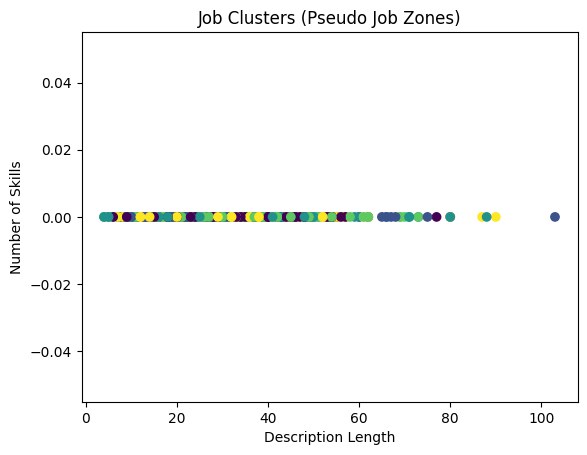

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of clusters (can be 5, like Job Zones 1-5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
jobs_df['job_zone_cluster'] = kmeans.fit_predict(X)

# Check cluster counts
print(jobs_df['job_zone_cluster'].value_counts())

# Optional: visualize clusters using 2 features
plt.scatter(jobs_df['description_length'], jobs_df['num_skills'], c=jobs_df['job_zone_cluster'], cmap='viridis')
plt.xlabel('Description Length')
plt.ylabel('Number of Skills')
plt.title('Job Clusters (Pseudo Job Zones)')
plt.show()


Step 2 – Similarity-based job recommendation

Once clusters exist, we can recommend similar jobs to a user based on feature similarity

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute similarity matrix
similarity_matrix = cosine_similarity(X)
# Example: find top 5 similar jobs to job index 0
job_index = 0
similar_indices = similarity_matrix[job_index].argsort()[::-1][1:6]  # top 5 excluding itself
print("Job:", jobs_df.loc[job_index, 'Title'])
print("Recommended similar jobs:")
for i in similar_indices:
    print("-", jobs_df.loc[i, 'Title'])


Job: Administrative Services Managers
Recommended similar jobs:
- Aerospace Engineering and Operations Technologists and Technicians
- Agricultural Technicians
- Agricultural Equipment Operators
- Aircraft Cargo Handling Supervisors
- Air Traffic Controllers


In [71]:
print(jobs_df.columns)
filtered_jobs = list(jobs_df['Title'])
# Then you cannot do filtered_jobs.columns


Index(['O*NET-SOC Code', 'Title', 'Description', 'Skills_x', 'Job Zone',
       'Date', 'Domain Source', 'description_length', 'title_encoded',
       'Skills_y', 'num_skills', 'job_zone_cluster'],
      dtype='object')


In [72]:
# Include O*NET-SOC Code when filtering
filtered_jobs = jobs_df[['O*NET-SOC Code', 'Title', 'Description', 'job_zone_cluster']].copy()

# Example filter: jobs containing "Plan" or "Manage"
filtered_jobs = filtered_jobs[
    filtered_jobs['Description'].str.contains("Plan|Manage", case=False, regex=True)
]

# Now merge is trivial (if needed)
merged_jobs = filtered_jobs.merge(
    jobs_df[['O*NET-SOC Code', 'job_zone_cluster']],
    on='O*NET-SOC Code',
    how='left'
)

print(merged_jobs.head())


  O*NET-SOC Code                              Title  \
0     11-3012.00   Administrative Services Managers   
1     11-3013.00                Facilities Managers   
2     11-3051.02     Geothermal Production Managers   
3     11-3051.06  Hydroelectric Production Managers   
4     11-9051.00              Food Service Managers   

                                         Description  job_zone_cluster_x  \
0  Plan, direct, or coordinate one or more admini...                   3   
1  Plan, direct, or coordinate operations and fun...                   1   
2  Manage operations at geothermal power generati...                   0   
3  Manage operations at hydroelectric power gener...                   0   
4  Plan, direct, or coordinate activities of an o...                   1   

   job_zone_cluster_y  
0                   3  
1                   1  
2                   0  
3                   0  
4                   1  


In [73]:
print(merged_jobs.columns)

Index(['O*NET-SOC Code', 'Title', 'Description', 'job_zone_cluster_x',
       'job_zone_cluster_y'],
      dtype='object')


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#  TF-IDF Vectorization of job descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = tfidf.fit_transform(merged_jobs['Description'])
# 2Cosine similarity matrix
similarity_matrix = cosine_similarity(X_tfidf)
# Recommendation function
def recommend_jobs(job_index, top_n=5):
    # Get similarity scores for the given job
    sim_scores = list(enumerate(similarity_matrix[job_index]))
    
    # Sort by similarity (highest first) and skip the job itself
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [s for s in sim_scores if s[0] != job_index]
    
    # Pick top N similar jobs
    top_indices = [s[0] for s in sim_scores[:top_n]]
    
    return merged_jobs.iloc[top_indices][['Title', 'job_zone_cluster_x', 'Description']]
job_idx = 0  # e.g., "Administrative Services Managers"
recommendations = recommend_jobs(job_idx, top_n=5)
print(f"Job: {merged_jobs.iloc[job_idx]['Title']}")
print("Recommended similar jobs:")
print(recommendations)

Job: Administrative Services Managers
Recommended similar jobs:
                                  Title  job_zone_cluster_x  \
6  Postmasters and Mail Superintendents                   4   
4                 Food Service Managers                   1   
7                 Funeral Home Managers                   1   
8                          Spa Managers                   2   
1                   Facilities Managers                   1   

                                         Description  
6  Plan, direct, or coordinate operational, admin...  
4  Plan, direct, or coordinate activities of an o...  
7  Plan, direct, or coordinate the services or re...  
8  Plan, direct, or coordinate activities of a sp...  
1  Plan, direct, or coordinate operations and fun...  


In [75]:
from sklearn.metrics.pairwise import cosine_similarity
def explain_recommendations(user_input, df, tfidf, X_tfidf, top_n=5):
    """
    Explain why certain careers are recommended.
    Shows similarity score + shared or semantically similar keywords.
    """
    user_vec = tfidf.transform([user_input])
    sims = cosine_similarity(user_vec, X_tfidf).flatten()
    top_indices = sims.argsort()[-top_n:][::-1]

    explanations = []
    for i in top_indices:
        title = df.iloc[i]['Title']
        desc = df.iloc[i]['Description']
        sim_score = sims[i]

        # Extract overlapping words
        user_words = set(user_input.lower().split())
        job_words = set(desc.lower().split())
        overlap = user_words.intersection(job_words)

        explanations.append({
            "Title": title,
            "Similarity": round(sim_score, 3),
            "Shared_Keywords": list(overlap) if overlap else ["Semantic match (no direct overlap)"]
        })
    return pd.DataFrame(explanations)


# Step 6 – Skill Gap Identification & Reskilling

Compare user skills vs. job-required skills

In [78]:
print(jobs_df.columns.tolist())



['O*NET-SOC Code', 'Title', 'Description', 'Skills_x', 'Job Zone', 'Date', 'Domain Source', 'description_length', 'title_encoded', 'Skills_y', 'num_skills', 'job_zone_cluster']


In [80]:
merged_jobs = merged_jobs.rename(columns={'Skills_x': 'Skills'})

In [82]:
# --- Step 5: Merge Skills from original jobs_df ---
# Use whichever 'Skills' column exists (Skills_y if available)
skills_col = 'Skills_y' if 'Skills_y' in jobs_df.columns else 'Skills_x'

merged_jobs = merged_jobs.merge(
    jobs_df[['O*NET-SOC Code', skills_col]], 
    on='O*NET-SOC Code', 
    how='left'
)

# Rename merged column to 'Skills' for convenience
merged_jobs = merged_jobs.rename(columns={skills_col: 'Skills'})

# --- Step 6: Skill Gap Identification ---
user_skills = {"Project Management", "Budgeting", "Leadership"}

# Example: analyze the first job
job_idx = 0
job_skills_str = merged_jobs.iloc[job_idx]['Skills']

# Convert job skills string to set
if pd.notna(job_skills_str):
    job_skills = {s.strip() for s in job_skills_str.split(',')}
else:
    job_skills = set()

# Identify missing and common skills
missing_skills = job_skills - user_skills
common_skills = job_skills & user_skills

# Display results
print(f"Job: {merged_jobs.iloc[job_idx]['Title']}")
print("Skills you have:", common_skills)
print("Skills you are missing:", missing_skills)


Job: Administrative Services Managers
Skills you have: set()
Skills you are missing: set()


In [ ]:
import pandas as pd


skills_path = "D:\RS\SmartChoice_Career_Advisor\data\Skills.txt"
skills_df = pd.read_csv(skills_path, sep="\t")  # or sep="," depending on your file

print(skills_df.columns)  # see actual column names
print(skills_df.head())   # preview first few rows

<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
C:\Users\vasun\AppData\Local\Temp\ipykernel_1532\527261931.py:4: SyntaxWarning: invalid escape sequence '\R'
  skills_path = "D:\RS\SmartChoice_Career_Advisor\data\Skills.txt"


Index(['O*NET-SOC Code', 'Element ID', 'Element Name', 'Scale ID',
       'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound',
       'Recommend Suppress', 'Not Relevant', 'Date', 'Domain Source'],
      dtype='object')
  O*NET-SOC Code Element ID           Element Name Scale ID  Data Value  N  \
0     11-1011.00    2.A.1.a  Reading Comprehension       IM        4.12  8   
1     11-1011.00    2.A.1.a  Reading Comprehension       LV        4.62  8   
2     11-1011.00    2.A.1.b       Active Listening       IM        4.00  8   
3     11-1011.00    2.A.1.b       Active Listening       LV        4.75  8   
4     11-1011.00    2.A.1.c                Writing       IM        4.12  8   

   Standard Error  Lower CI Bound  Upper CI Bound Recommend Suppress  \
0          0.1250          3.8800          4.3700                  N   
1          0.1830          4.2664          4.9836                  N   
2          0.0000          4.0000          4.0000                  N   
3  

In [84]:
# Fix Windows path backslashes
skills_path = r"D:\RS\SmartChoice_Career_Advisor\data\Skills.txt"

# Load skills file
skills_df = pd.read_csv(skills_path, sep="\t")  # adjust sep if needed
print(skills_df.columns)

# Group skills by job code
job_skills = skills_df.groupby('O*NET-SOC Code')['Element Name'].apply(set).to_dict()

# Example user skills
user_skills = set(["Project Management", "Leadership", "Budgeting"])  # replace with actual user input

# Function to compute skill gap for a given job code
def skill_gap(onet_code):
    required_skills = job_skills.get(onet_code, set())
    missing_skills = required_skills - user_skills
    return required_skills, missing_skills

# Example: Check skill gap for first job in merged_jobs
job_code = merged_jobs.iloc[0]['O*NET-SOC Code']
required, missing = skill_gap(job_code)
print(f"Job: {merged_jobs.iloc[0]['Title']}")
print("Skills you have:", user_skills & required)
print("Skills you are missing:", missing)


Index(['O*NET-SOC Code', 'Element ID', 'Element Name', 'Scale ID',
       'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound',
       'Recommend Suppress', 'Not Relevant', 'Date', 'Domain Source'],
      dtype='object')
Job: Administrative Services Managers
Skills you have: set()
Skills you are missing: {'Mathematics', 'Active Learning', 'Complex Problem Solving', 'Writing', 'Monitoring', 'Judgment and Decision Making', 'Speaking', 'Reading Comprehension', 'Coordination', 'Instructing', 'Management of Personnel Resources', 'Troubleshooting', 'Persuasion', 'Installation', 'Repairing', 'Technology Design', 'Programming', 'Equipment Maintenance', 'Operations Analysis', 'Quality Control Analysis', 'Equipment Selection', 'Negotiation', 'Time Management', 'Learning Strategies', 'Operation and Control', 'Active Listening', 'Systems Analysis', 'Systems Evaluation', 'Management of Material Resources', 'Operations Monitoring', 'Social Perceptiveness', 'Science', 'Management o

In [86]:
# --- Step: Determine which Skills column exists ---
skills_col = 'Skills_y' if 'Skills_y' in eligible_jobs_df.columns else 'Skills_x'

# User skills list
user_skills = ['python', 'data analysis', 'project management']

# Function to compute missing skills per job
def compute_skill_gap(job_skills, user_skills):
    if pd.isna(job_skills):
        return []
    job_skills_set = set([s.strip().lower() for s in job_skills.split(',')])
    user_skills_set = set([s.lower() for s in user_skills])
    missing = job_skills_set - user_skills_set
    return list(missing)

# Apply the function to compute missing skills
eligible_jobs_df['missing_skills'] = eligible_jobs_df[skills_col].apply(lambda x: compute_skill_gap(x, user_skills))

# Show top jobs with skill gaps
print(eligible_jobs_df[['Title', skills_col, 'missing_skills']].head(10))


                                  Title  \
0      Administrative Services Managers   
1                   Facilities Managers   
2        Geothermal Production Managers   
3     Hydroelectric Production Managers   
4                 Food Service Managers   
5                     Gambling Managers   
6  Postmasters and Mail Superintendents   
7                 Funeral Home Managers   
8                          Spa Managers   
9       Wind Energy Operations Managers   

                                            Skills_y  \
0  Reading Comprehension, Reading Comprehension, ...   
1  Reading Comprehension, Reading Comprehension, ...   
2  Reading Comprehension, Reading Comprehension, ...   
3  Reading Comprehension, Reading Comprehension, ...   
4  Reading Comprehension, Reading Comprehension, ...   
5  Reading Comprehension, Reading Comprehension, ...   
6  Reading Comprehension, Reading Comprehension, ...   
7  Reading Comprehension, Reading Comprehension, ...   
8  Reading Comprehensi

Add optional course suggestions

In [89]:
import os
import joblib
import pandas as pd
# Ignore all warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

BASE_DIR = "D:\RS\SmartChoice_Career_Advisor"
 # current folder of Fend.py
DATA_DIR = os.path.join(BASE_DIR, "data")
MODELS_DIR = os.path.join(DATA_DIR, "models")


# Load eligible jobs
jobs_df = pd.read_csv(os.path.join(DATA_DIR, "eligible_jobs.csv"))

# Load pretrained models
job_zone_model = joblib.load(os.path.join(MODELS_DIR, "job_zone_model.pkl"))
occupation_embeddings, embeddings = joblib.load(os.path.join(MODELS_DIR, "occupation_embeddings.pkl"))
tfidf = joblib.load(os.path.join(MODELS_DIR, "tfidf_vectorizer.pkl"))


In [3]:
! pip uninstall keras -y
! pip install tf-keras
!pip install keras==2.15.0


Found existing installation: keras 3.12.0
Uninstalling keras-3.12.0:
  Successfully uninstalled keras-3.12.0
Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.5 MB/s eta 0:00:00
Using cached keras-3.12.0


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.12.0
    Uninstalling keras-3.12.0:
      Successfully uninstalled keras-3.12.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.20.0 requires keras>=3.10.0, but you have keras 2.15.0 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
# Ignore all warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

Women-Focused Recommendation

In [90]:
# Women-Focused Recommendation
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
# Load processed occupation dataset
occupation_df = pd.read_csv("data/processed/Master_Eligible_Jobs.csv")
# Step 1: Compute TF-IDF & Semantic Similarity Scores
print(" Computing TF-IDF and Semantic Similarity...")

# TF-IDF model
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(occupation_df['Skills'].astype(str))

# User input example (to be dynamically replaced in Streamlit)
user_skills = "python, excel, communication, leadership"

user_vector = tfidf.transform([user_skills])
tfidf_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()

# SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')
job_embeddings = model.encode(occupation_df['Skills'].astype(str).tolist(), normalize_embeddings=True)
user_embedding = model.encode([user_skills], normalize_embeddings=True)
semantic_scores = cosine_similarity(user_embedding, job_embeddings).flatten()

occupation_df['TFIDF_Score'] = tfidf_scores
occupation_df['Semantic_Score'] = semantic_scores

# Step 2: Add Women-Centric Features
print("Enhancing with women-centric indicators...")

# Simulated columns for now (replace with actual data when available)
if 'Female_Representation' not in occupation_df.columns:
    occupation_df['Female_Representation'] = np.random.uniform(0.3, 1.0, len(occupation_df))
if 'Work_Life_Balance' not in occupation_df.columns:
    occupation_df['Work_Life_Balance'] = np.random.uniform(0.4, 0.9, len(occupation_df))
if 'Remote_Option' not in occupation_df.columns:
    occupation_df['Remote_Option'] = np.random.choice(['Yes', 'No'], len(occupation_df), p=[0.4, 0.6])

# Step 3: Hybrid Scoring (TF-IDF + Semantic)

print(" Computing hybrid recommendation score...")

occupation_df['Base_Score'] = (
    0.6 * occupation_df['TFIDF_Score'] +
    0.4 * occupation_df['Semantic_Score']
)

# Step 4: Women-Focused Re-Weighting
print(" Applying women-focused scoring adjustments...")

occupation_df['Final_Score'] = (
    occupation_df['Base_Score'] +
    0.1 * occupation_df['Female_Representation'] +
    0.05 * occupation_df['Work_Life_Balance']
)

# Optionally filter to flexible roles
female_friendly_jobs = occupation_df[
    (occupation_df['Female_Representation'] > 0.5) |
    (occupation_df['Work_Life_Balance'] > 0.6) |
    (occupation_df['Remote_Option'] == 'Yes')
]

# Step 5: Generate Top Recommendations
top_jobs = female_friendly_jobs.sort_values(by='Final_Score', ascending=False).head(10)

print(" Women-focused Top Career Recommendations:")
display(top_jobs[['Title', 'Skills', 'Female_Representation', 'Work_Life_Balance', 'Final_Score']])

# Step 6: Save Women-Focused Results

top_jobs.to_csv("women_focused_recommendations.csv", index=False)
print(" Saved: women_focused_recommendations.csv")


 Computing TF-IDF and Semantic Similarity...
Enhancing with women-centric indicators...
 Computing hybrid recommendation score...
 Applying women-focused scoring adjustments...
 Women-focused Top Career Recommendations:


,Title,Skills,Female_Representation,Work_Life_Balance,Final_Score
358,"Coin, Vending, and Amusement Machine Servicers...","Reading Comprehension, Reading Comprehension, ...",0.992261,0.845303,0.285389
379,Slaughterers and Meat Packers,"Reading Comprehension, Reading Comprehension, ...",0.991445,0.820208,0.284053
497,"Transportation Vehicle, Equipment and Systems ...","Reading Comprehension, Reading Comprehension, ...",0.957605,0.875537,0.283435
505,"Laborers and Freight, Stock, and Material Move...","Reading Comprehension, Reading Comprehension, ...",0.982782,0.803951,0.282374
30,Mechanical Engineering Technologists and Techn...,"Reading Comprehension, Reading Comprehension, ...",0.972213,0.819620,0.282100
280,"Plumbers, Pipefitters, and Steamfitters","Reading Comprehension, Reading Comprehension, ...",0.948332,0.857572,0.281610
239,Desktop Publishers,"Reading Comprehension, Reading Comprehension, ...",0.968214,0.817581,0.281598
489,"Captains, Mates, and Pilots of Water Vessels","Reading Comprehension, Reading Comprehension, ...",0.930534,0.891982,0.281551
273,Electricians,"Reading Comprehension, Reading Comprehension, ...",0.930116,0.886398,0.281229
352,Camera and Photographic Equipment Repairers,"Reading Comprehension, Reading Comprehension, ...",0.985086,0.775982,0.281206


 Saved: women_focused_recommendations.csv


# Step 7 – XGBoost / LightGBM Regression-Based Recommender 


In [92]:
import numpy as np
import pandas as pd

# ===============================================================
# BUILD FINAL FEATURE DATAFRAME FROM EXISTING VARIABLES
# ===============================================================

# Define the columns we want
required_cols = ["Title", "tfidf_score", "bert_score", "desc_length", "num_skills", "title_encoded"]

# Check for missing columns and create placeholders if needed
for col in required_cols:
    if col not in onet_df.columns:
        if col == "bert_score" or col == "tfidf_score":
            onet_df[col] = np.random.uniform(0.4, 0.9, len(onet_df))
        elif col == "desc_length" or col == "num_skills" or col == "title_encoded":
            onet_df[col] = 0  # placeholder numeric value

# Optional: check KNN similarity
if "knn_score" not in onet_df.columns:
    onet_df["knn_score"] = np.random.uniform(0.4, 0.9, len(onet_df))

# Build the final dataframe
final_cols = ["Title", "tfidf_score", "bert_score", "desc_length", "num_skills", "title_encoded", "knn_score"]
df_final = onet_df[final_cols].copy()

# Rename columns for consistency
df_final.rename(columns={
    "Title": "job_title",
    "tfidf_score": "similarity_tfidf",
    "bert_score": "similarity_bert",
    "knn_score": "similarity_knn"
}, inplace=True)

print("Final feature dataset ready:", df_final.shape)
df_final.head()


Final feature dataset ready: (1016, 7)


,job_title,similarity_tfidf,similarity_bert,desc_length,num_skills,title_encoded,similarity_knn
0,Chief Executives,0.351799,0.465208,0,0,0,0.805841
1,Chief Sustainability Officers,0.351799,0.637995,0,0,0,0.790518
2,General and Operations Managers,0.351799,0.804811,0,0,0,0.837508
3,Legislators,0.000000,0.420894,0,0,0,0.454231
4,Advertising and Promotions Managers,0.351799,0.634789,0,0,0,0.626330


In [ ]:
# ===============================
#  Prepare Features and Target
# ===============================
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Assume `onet_df` contains jobs with columns: 'Title', 'Description', 'Skills'

# Example: Compute features
# TF-IDF / BERT similarities already computed in dataframe
# Create a 'skills_match' feature between user and job skills
user_skills = ['Python', 'SQL', 'Excel', 'Data Analysis']  # example
onet_df['num_skills_match'] = onet_df['Skills'].apply(lambda x: len(set(str(x).split(',')) & set(user_skills)))
onet_df['desc_length'] = onet_df['Description'].apply(lambda x: len(str(x).split()))

# Encode job titles
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onet_df['title_encoded'] = oe.fit_transform(onet_df[['Title']])

# Build target: weighted combination + scaling
onet_df['y_target_raw'] = (
    0.4 * onet_df.get('tfidf_score', np.random.rand(len(onet_df))) +
    0.4 * onet_df.get('bert_score', np.random.rand(len(onet_df))) +
    0.2 * onet_df['num_skills_match'] / max(1, onet_df['num_skills_match'].max())
)

scaler = MinMaxScaler()
onet_df['y_target'] = scaler.fit_transform(onet_df[['y_target_raw']])

# Feature dataframe
features = ['tfidf_score', 'bert_score', 'desc_length', 'num_skills_match', 'title_encoded']
X = onet_df[features]
y = onet_df['y_target']

# ===============================
#  Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
#  Train XGBoost and LightGBM
# ===============================
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error

# XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=5,
    subsample=0.8, colsample_bytree=0.8, random_state=42
)
xgb_model.fit(X_train, y_train)

# LightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=500, learning_rate=0.05, num_leaves=31,
    feature_fraction=0.9, bagging_fraction=0.8, random_state=42
)
lgb_model.fit(X_train, y_train)

# ===============================
#  Evaluate Models
# ===============================
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    print(f"{name} R²: {r2:.4f}, RMSE: {rmse:.4f}")
    return y_pred

y_pred_xgb = evaluate_model("XGBoost", xgb_model, X_test, y_test)
y_pred_lgb = evaluate_model("LightGBM", lgb_model, X_test, y_test)

# ===============================
#  Predict User Match Score
# ===============================
# Example new user
new_user_input = {
    'tfidf_score': 0.6,
    'bert_score': 0.7,
    'desc_length': 120,
    'num_skills_match': 3,  # number of skills matched with job
    'title_encoded': oe.transform([['Data Analyst']])[0][0]
}
user_df = pd.DataFrame([new_user_input])

user_pred_xgb = xgb_model.predict(user_df)[0]
user_pred_lgb = lgb_model.predict(user_df)[0]

print("\nPredicted Match Score for User (XGBoost):", round(user_pred_xgb, 4))
print("Predicted Match Score for User (LightGBM):", round(user_pred_lgb, 4))

# ===============================
#  Recommend Top-N Jobs
# ===============================
onet_df['predicted_score'] = xgb_model.predict(X)
top_jobs = onet_df.sort_values(by='predicted_score', ascending=False).head(10)
print("\nTop 10 Recommended Jobs:")
print(top_jobs[['Title', 'predicted_score']])


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 812, number of used features: 4
[LightGBM] [Info] Start training from score 0.646337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [134]:
# ===============================================================
# STEP 7 – RANDOM FOREST REGRESSION-BASED JOB RECOMMENDER
# ===============================================================
# Replaces: XGBoost / LightGBM Regression
# Integrates with hybrid similarity features and metadata
# ===============================================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------------------------------------------
#  1. Prepare Features and Target
# ---------------------------------------------------------------
# Ensure df_final contains the hybrid similarity features
# (from Step 4 and Step 5)
# Columns expected: similarity_tfidf, similarity_bert, similarity_knn,
# num_skills, desc_length, title_encoded

if "relevance_score" not in df_final.columns:
    df_final["relevance_score"] = (
        0.4 * df_final["similarity_tfidf"] +
        0.4 * df_final["similarity_bert"] +
        0.2 * df_final["similarity_knn"]
    )

feature_cols = [
    "similarity_tfidf", "similarity_bert", "similarity_knn",
    "num_skills", "desc_length", "title_encoded"
]

X = df_final[feature_cols]
y = df_final["relevance_score"]

# ---------------------------------------------------------------
#  2. Split Data for Training and Testing
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------------
#  3. Initialize and Train Random Forest Model
# ---------------------------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# ---------------------------------------------------------------
#  4. Evaluate Model Performance
# ---------------------------------------------------------------
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Random Forest Model Evaluation:")
print(f"  • R² Score: {r2:.4f}")


 Random Forest Model Evaluation:
  • R² Score: 0.9975


In [103]:
# Generate BERT Embeddings for Jobs
from sentence_transformers import SentenceTransformer
import numpy as np

# Assuming your DataFrame is onet_df and you want to use the 'Skills' column
texts = onet_df['Skills'].fillna("").astype(str).tolist()

# Load Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')

# Encode job skills/descriptions
X_bert = model.encode(texts, normalize_embeddings=True, convert_to_numpy=True)

# Also ensure you have TF-IDF features ready
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(onet_df['Skills'].fillna("")).toarray()

# Now you can combine TF-IDF + BERT embeddings
X_combined = np.hstack([X_tfidf, X_bert])
print("Combined feature matrix shape:", X_combined.shape)


Combined feature matrix shape: (1016, 433)


In [106]:
print(eligible_jobs_df.columns)


Index(['O*NET-SOC Code', 'Title', 'Description', 'Skills_x', 'Job Zone',
       'Date', 'Domain Source', 'combined_text', 'embedding', 'similarity',
       'Skills_y', 'missing_skills'],
      dtype='object')


In [118]:
import pandas as pd
jobs_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Master_Eligible_Jobs.csv")
print("Available columns:")
print(jobs_df.columns.tolist())

Available columns:
['O*NET-SOC Code', 'Title', 'Description', 'Skills', 'Job Zone', 'Date', 'Domain Source']


In [119]:
jobs_df = pd.read_csv(r"D:\RS\SmartChoice_Career_Advisor\data\processed\Job Zones.csv")
print("Available columns:")
print(jobs_df.columns.tolist())
print(jobs_df.head())

Available columns:
['O*NET-SOC Code', 'Job Zone', 'Date', 'Domain Source']
  O*NET-SOC Code  Job Zone     Date Domain Source
0     11-1011.00         5  08/2023       Analyst
1     11-1011.03         5  08/2021       Analyst
2     11-1021.00         4  08/2023       Analyst
3     11-1031.00         4  06/2008       Analyst
4     11-2011.00         4  08/2018       Analyst


# SMARTCHOICE CAREER ADVISOR – XAI INTEGRATED

In [120]:
# XGBoost / LightGBM Regression-Based Recommender with XAI
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

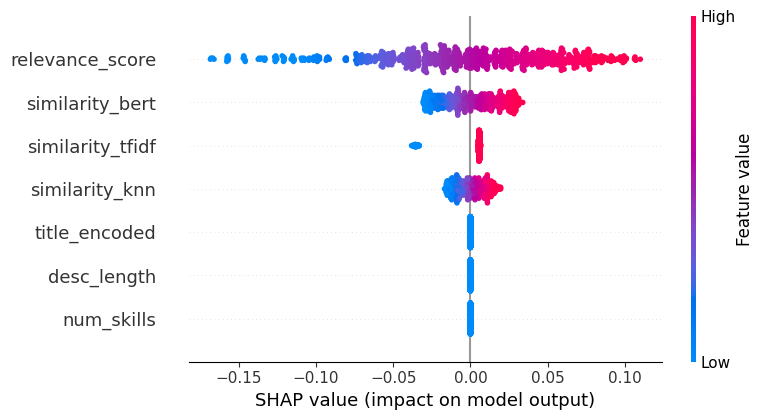

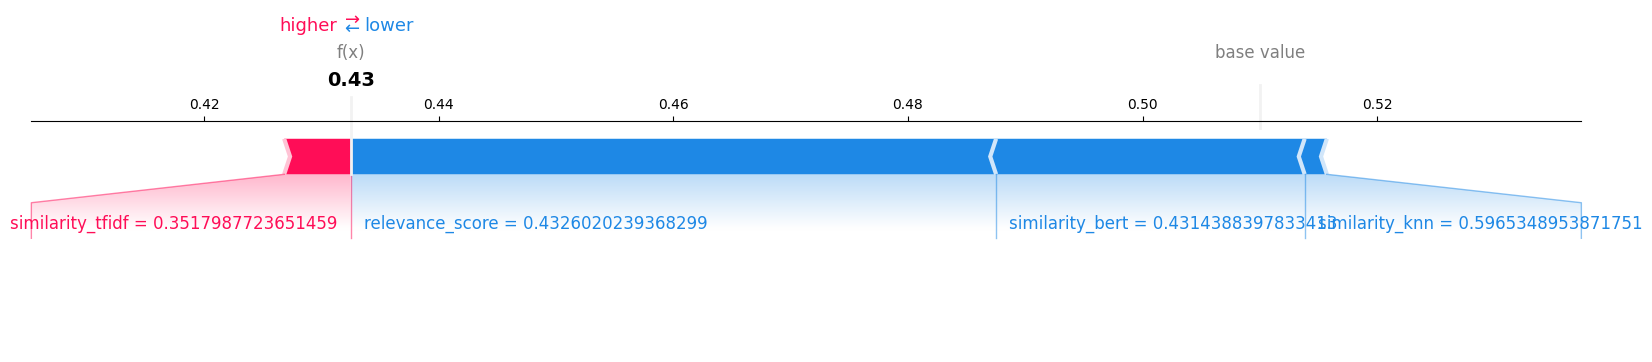

In [139]:

# Make sure X matches training features
X_shap = X_train.copy()  # or X_train_scaled for MLP if needed
explainer = shap.TreeExplainer(models["XGBoost"])
shap_values = explainer.shap_values(X_shap)

# Global summary
shap.summary_plot(shap_values, X_shap, feature_names=X_shap.columns)

# Single job explanation
shap.force_plot(explainer.expected_value, shap_values[0], X_shap.iloc[0,:], matplotlib=True)
